In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sns
from matplotlib import style
style.use('ggplot')
import plotly
import plotly.subplots
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
import folium as flm

%matplotlib inline

In [2]:
pyo.init_notebook_mode(connected = True)
cf.go_offline()

In [3]:
df = pd.read_excel(r'C:\Users\avtap\Downloads\Covid cases in India.xlsx')

df.head(5)

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,12,0,1,0
1,2,Chhattisgarh,6,0,0,0
2,3,Delhi,38,1,6,1
3,4,Gujarat,43,0,0,3
4,5,Haryana,16,14,11,0


In [4]:
df.drop(['S. No.'] , axis = 1, inplace = True)

In [5]:
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,Andhra Pradesh,12,0,1,0
1,Chhattisgarh,6,0,0,0
2,Delhi,38,1,6,1
3,Gujarat,43,0,0,3
4,Haryana,16,14,11,0
5,Himachal Pradesh,4,0,0,1
6,Karnataka,20,0,3,2
7,Kerala,131,7,11,0
8,Madhya Pradesh,23,0,0,1
9,Maharashtra,144,3,15,4


In [6]:
df['Total Cases'] = df['Total Confirmed cases (Indian National)'] + df['Total Confirmed cases ( Foreign National )']

In [7]:
df.head()

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases
0,Andhra Pradesh,12,0,1,0,12
1,Chhattisgarh,6,0,0,0,6
2,Delhi,38,1,6,1,39
3,Gujarat,43,0,0,3,43
4,Haryana,16,14,11,0,30


In [8]:
df['Total Cases'].sum()

729

In [9]:
df['Active Cases'] = df['Total Cases']-df['Cured']-df['Death']

In [10]:
df.head()

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19


<AxesSubplot:>

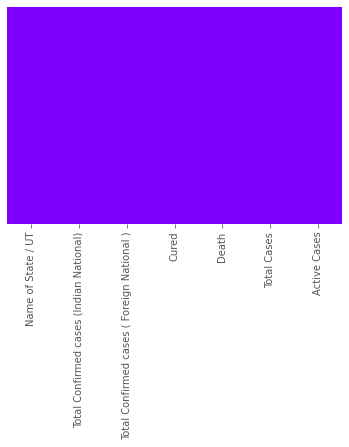

In [11]:
sns.heatmap(df.isnull() , yticklabels = False , cmap = 'rainbow' ,cbar = False)

In [12]:
df.style.background_gradient(cmap = 'Reds')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,3
6,Karnataka,20,0,3,2,20,15
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,22
9,Maharashtra,144,3,15,4,147,128


In [13]:
Total_Active_Cases = df.groupby('Name of State / UT')['Active Cases'].sum().sort_values(ascending = False).to_frame()

Total_Active_Cases.style.background_gradient(cmap ='Reds')

,Active Cases
Name of State / UT,
Maharashtra,128
Kerala,127
Telengana,44
Rajasthan,40
Gujarat,40
Tamil Nadu,33
Uttar Pradesh,32
Delhi,32
Punjab,28


<AxesSubplot:xlabel='Name of State / UT'>

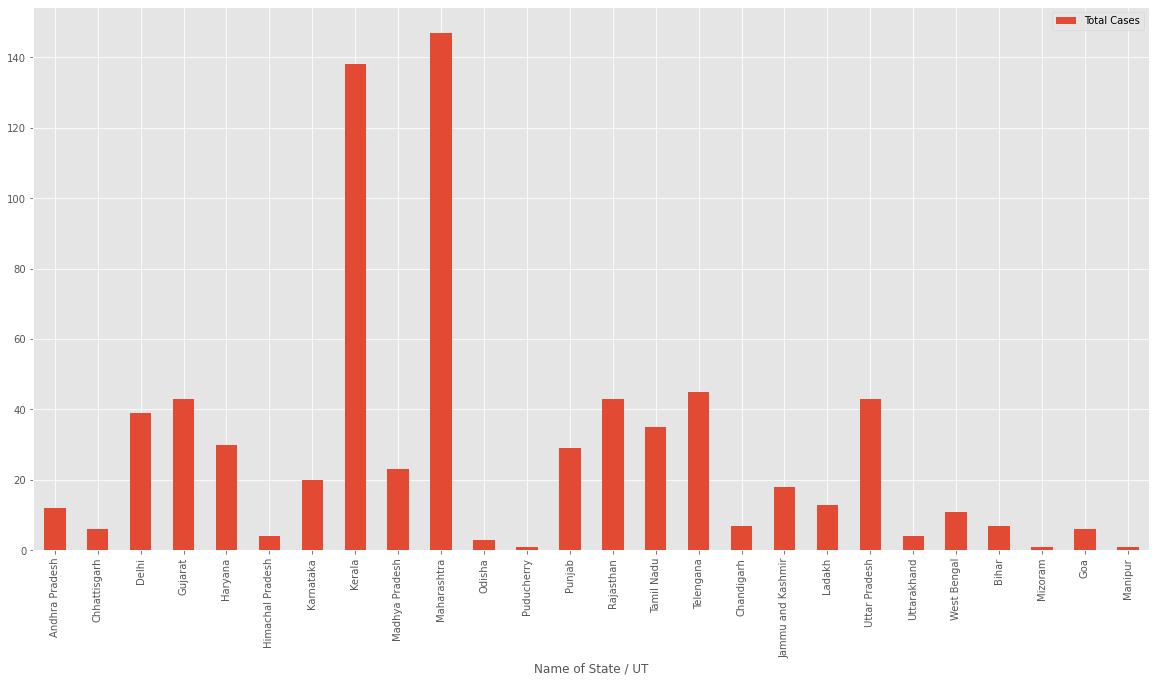

In [14]:
df.plot(kind = 'bar', x = 'Name of State / UT' , y = 'Total Cases'  , figsize = (20,10) )

In [15]:
df.iplot(kind = 'bar', x = 'Name of State / UT' , y = 'Total Cases'  )

In [16]:
px.bar(df ,x = 'Name of State / UT' , y = 'Total Cases' )

In [17]:
px.scatter(df ,x = 'Name of State / UT' , y = 'Total Cases')

In [18]:
df.iplot(kind = 'scatter', x = 'Name of State / UT' , y = 'Total Cases' , mode ='markers+lines' ,  title = 'Cases by States' , xTitle = 'Name of State / UT' , yTitle = 'Total Cases' , size = 20 , colors = 'red' )

In [19]:
Indian_Cordinates = pd.read_excel(r'C:\Users\avtap\Downloads\Indian Coordinates.xlsx')

Indian_Cordinates

,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973
5,Chandigarh,30.719997,76.780006
6,Chhattisgarh,22.090420,82.159987
7,Dadra And Nagar Haveli,20.266578,73.016618
8,Delhi,28.669993,77.230004
9,Goa,15.491997,73.818001


In [20]:
DF = pd.merge(Indian_Cordinates , df ,on = 'Name of State / UT' )

DF

,Name of State / UT,Latitude,Longitude,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,14.750429,78.570026,12,0,1,0,12,11
1,Delhi,28.669993,77.230004,38,1,6,1,39,32
2,Haryana,28.450006,77.019991,16,14,11,0,30,19
3,Karnataka,12.570381,76.919997,20,0,3,2,20,15
4,Kerala,8.900373,76.569993,131,7,11,0,138,127
5,Maharashtra,19.250232,73.160175,144,3,15,4,147,128
6,Punjab,31.519974,75.980003,29,0,0,1,29,28
7,Rajasthan,26.449999,74.639981,41,2,3,0,43,40
8,Telengana,18.112400,79.019300,34,11,1,0,45,44
9,Tamil Nadu,12.920386,79.150042,32,3,1,1,35,33


In [21]:
map = flm.Map(location = [20,70] , zoom_start = 4, tiles='Stamenterrain')

for lat,long,value,name in zip(DF['Latitude'] , DF['Longitude'] , DF['Total Cases'] ,DF['Name of State / UT']):
    flm.CircleMarker(
        
        [lat , long],
        radius = value*0.4,
        popup = ('<strong>State</strong>: '+str(name).capitalize()+'<br>''<strong>Total Cases</strong>: '+str(value)+'<br>'),
        color = 'red',
        fill_color = 'red',
        fill_opacity = 0.3).add_to(map)
                    

In [22]:
map

In [23]:
India = pd.read_excel(r'C:\Users\avtap\Downloads\per_day_cases.xlsx',parse_dates = True , sheet_name = 'India')
Italy = pd.read_excel(r'C:\Users\avtap\Downloads\per_day_cases.xlsx',parse_dates = True , sheet_name = 'Italy')
Korea = pd.read_excel(r'C:\Users\avtap\Downloads\per_day_cases.xlsx',parse_dates = True , sheet_name = 'Korea')
Wuhan = pd.read_excel(r'C:\Users\avtap\Downloads\per_day_cases.xlsx',parse_dates = True , sheet_name = 'Wuhan')

In [24]:
India.head()

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-30,1,1,NaN
1,2020-01-31,1,0,NaN
2,2020-02-01,1,0,NaN
3,2020-02-02,2,1,NaN
4,2020-02-03,3,1,NaN


Text(0.5, 1.0, 'WUHAN')

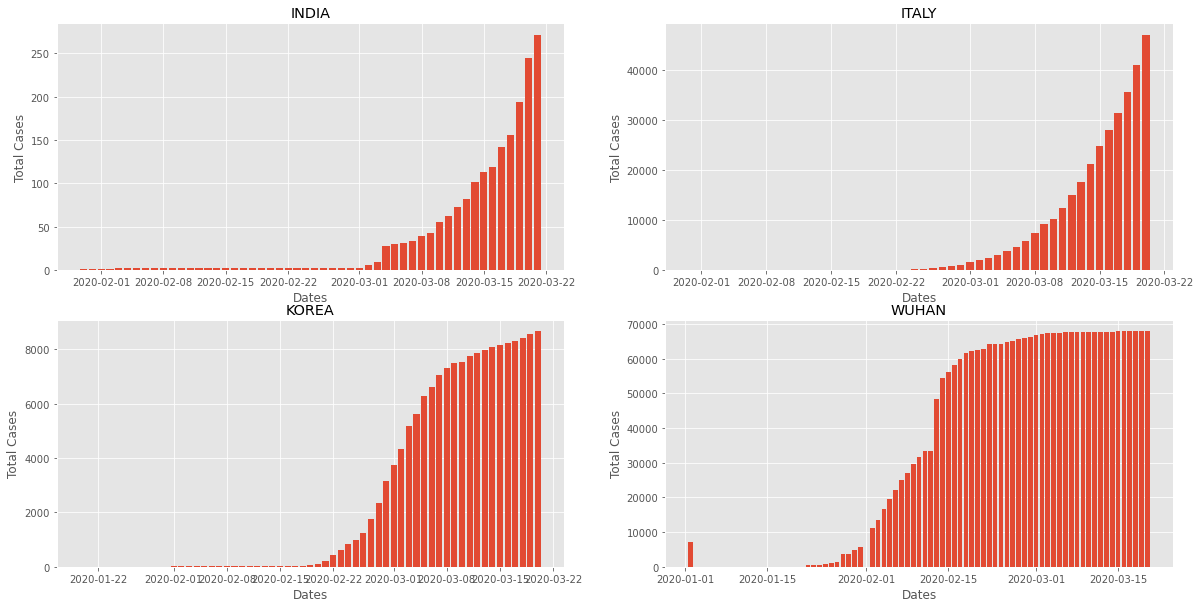

In [25]:
mp.figure(1, figsize = (20,10))

mp.subplot(221)
mp.bar(India['Date'] , India['Total Cases'])
mp.xlabel('Dates')
mp.ylabel('Total Cases')
mp.title('INDIA')

mp.subplot(222)
mp.bar(Italy['Date'] , Italy['Total Cases'])
mp.xlabel('Dates')
mp.ylabel('Total Cases')
mp.title('ITALY')

mp.subplot(223)
mp.bar(Korea['Date'] , Korea['Total Cases'])
mp.xlabel('Dates')
mp.ylabel('Total Cases')
mp.title('KOREA')

mp.subplot(224)
mp.bar(Wuhan['Date'] , Wuhan['Total Cases'])
mp.xlabel('Dates')
mp.ylabel('Total Cases')
mp.title('WUHAN')

In [26]:
fig = px.scatter(India , x = 'Date' , y = 'Total Cases' , color = 'Total Cases' , title = 'India')
fig.show()

In [27]:
fig = px.scatter(Italy , x = 'Date' , y = 'Total Cases' , color = 'Total Cases' , title = 'Italy')
fig.show()

In [28]:
fig = px.scatter(Korea , x = 'Date' , y = 'Total Cases' , color = 'Total Cases' , title = 'Korea')
fig.show()

In [29]:
fig = px.scatter(Wuhan , x = 'Date' , y = 'Total Cases' , color = 'Total Cases' , title = 'Wuhan')
fig.show()


In [30]:
world_data = pd.read_excel(r'C:\Users\avtap\world covid data.xlsx' ,parse_dates=['Last Update'] )

In [31]:
world_data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1,0,0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14,0,0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6,0,0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1,0,0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0,0,0


In [32]:
world_data.rename(columns = {'ObservationDate':'Date' , 'Country/Region':'Country'},inplace = True)

In [33]:
world_data.query('Country=="India"')

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
430,431,01/30/2020,NaN,India,2020-01-30 16:00:00,1,0,0
491,492,01/31/2020,NaN,India,2020-01-31 23:59:00,1,0,0
547,548,02/01/2020,NaN,India,2020-01-31 08:15:00,1,0,0
607,608,02/02/2020,NaN,India,2020-02-02 06:03:08,2,0,0
672,673,02/03/2020,NaN,India,2020-02-03 21:43:02,3,0,0
740,741,02/04/2020,NaN,India,2020-02-03 21:43:02,3,0,0
810,811,02/05/2020,NaN,India,2020-02-03 21:43:02,3,0,0
881,882,02/06/2020,NaN,India,2020-02-03 21:43:02,3,0,0
954,955,02/07/2020,NaN,India,2020-02-03 21:43:02,3,0,0
1026,1027,02/08/2020,NaN,India,2020-02-03 21:43:02,3,0,0


In [34]:
confirmed = world_data.groupby('Date').sum()['Confirmed'].reset_index()
recovered = world_data.groupby('Date').sum()['Recovered'].reset_index()
death = world_data.groupby('Date').sum()['Deaths'].reset_index()

In [35]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = confirmed['Date'], y = confirmed['Confirmed'],
                        mode = 'lines+markers',
                        name = 'Confirmed',
                        line = dict(color = 'blue'  ,width = 2)))

fig.add_trace(go.Scatter(x = death['Date'], y = death['Deaths'],
                        mode = 'lines+markers',
                        name = 'Deaths',
                        line = dict(color = 'red'  ,width = 2)))

fig.add_trace(go.Scatter(x = recovered['Date'], y = recovered['Recovered'],
                        mode = 'lines+markers',
                        name = 'Recovered',
                        line = dict(color = 'green'  ,width = 2)))

In [36]:
confirmed_cases = pd.read_csv(r'C:\Users\avtap\Downloads\time_series_covid_19_confirmed.csv')
confirmed_cases.rename(columns = {'Country/Region': 'Country'},inplace = True)
confirmed_cases.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,45723,45844,46116,46274,46516,46718,46837,46837,47072,47306
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,36245,36790,37625,38182,39014,39719,40501,41302,42148,42988
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,80168,81212,82221,83199,84152,85084,85927,86730,87502,88252
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,6610,6610,6712,6745,6790,6842,6904,6955,7005,7050
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,15008,15087,15103,15139,15251,15319,15361,15493,15536,15591


In [37]:
latlong = pd.merge(world_data , confirmed_cases, on =['Country' , 'Province/State'])

In [38]:
fig = px.density_mapbox(latlong,
                        lat = "Lat" , lon = 'Long',
                       hover_data = ["Confirmed" , "Deaths" , "Recovered"],
                       animation_frame = 'Date',
                       color_continuous_scale = 'Portland',
                       radius = 7,
                       zoom = 4,
                       height = 700)

fig.update_layout(title = 'Corona Virus Cases')
fig.update_layout(mapbox_style= "open-street-map")
fig.update_layout(margin = {"r":0 , "t":0,"l":0,"b":0})